# TP 5 : Test de Student

Nous nous intéressons ici au test de Student de comparaison des moyennes sur 2 échantillons indépendants simulés selon des lois normales de même variance $\sigma^2 > 0$,
\begin{equation*}
X_1,\dots,X_p \sim \mathcal{N}(m_X,\sigma^2) \quad \text{et} \quad Y_1,\dots,Y_q \sim \mathcal{N}(m_Y,\sigma^2).
\end{equation*}
Pour expérimenter, nous prendrons $p=q=10$, $m_X=m_Y=0$ et $\sigma^2=1$.

In [3]:
# Génération des échantillons
x <- rnorm(10)
y <- rnorm(10)

Le test bilatéral de comparaison des moyennes sur ces 2 échantillons se fait en utilisant la fonction `t.test()` avec l'option `var.equal=TRUE`.

In [5]:
# Test bilatéral de comparaison des moyennes
resultat_test <- t.test(x, y, var.equal=TRUE)

# L'objet obtenu contient beaucoup d'informations
resultat_test


	Two Sample t-test

data:  x and y
t = 0.41386, df = 18, p-value = 0.6839
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.8445678  1.2589321
sample estimates:
mean of x mean of y 
0.3498768 0.1426946 


<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li>Donner l'hypothèse nulle $H_0$ et l'hypothèse alternative $H_1$ de ce test.</li>
        <li>Pourquoi faut-il supposer que les deux échantillons aient la même variance ? En particulier, quelle est la loi de la variable
            \begin{equation*}
                (p+q-2)\frac{\tilde{\sigma}^2_{p,q}}{\sigma^2} \quad \text{où} \quad \tilde{\sigma}^2_{p,q} = \frac{1}{p+q-2}\sum_{k=1}^p\left( X_k - \bar{X}_p \right)^2 + \frac{1}{p+q-2}\sum_{k=1}^q\left( Y_k - \bar{Y}_q \right)^2\ ?
            \end{equation*}
        </li>
        <li>En déduire la loi de la statistique de test
            \begin{equation*}
                T = \sqrt{\frac{pq}{p+q}} \times \frac{\bar{X}_p - \bar{Y}_q}{\sqrt{\tilde{\sigma}^2_{p,q}}}.
            \end{equation*}
        </li>
        <li>Vérifier le calcul de la statistique de test donné dans <code>resultat_test</code>.</li>
        <li>Quelle est la p-valeur du test <code>resultat_test</code> ? Pour un niveau de 95%, doit-on accepter ou rejeter $H_0$ ? Est-ce cohérent avec notre simulation initiale ?</li>
        <li>Recalculer cette p-valeur à partir d'une loi de Student à 18 degrés de liberté.</li>
    </ol>
</div>

\begin{equation*}
                (p+q-2)\frac{\tilde{\sigma}^2_{p,q}}{\sigma^2} \quad \text{où} \quad \tilde{\sigma}^2_{p,q} = \frac{1}{p+q-2}\sum_{k=1}^p\left( X_k - \bar{X}_p \right)^2 + \frac{1}{p+q-2}\sum_{k=1}^q\left( Y_k - \bar{Y}_q \right)^2\ ?
            \end{equation*}

\begin{equation*}
                T = \sqrt{\frac{pq}{p+q}} \times \frac{\bar{X}_p - \bar{Y}_q}{\sqrt{\tilde{\sigma}^2_{p,q}}}.
            \end{equation*}

In [24]:
# À FAIRE

# H0 = Les moyennes de X et Y sont égales ; H1 = Les moyennes de X et Y sont différentes

# C'est une des hypothèses du théorème de Cochran. Cette variable suit la loi du Chi^2 à p+q-2 degrés de liberté.

# C'est une loi de Student à p+q-2 degrés de liberté.

mean_x_p <- mean(x)
mean_y_q <- mean(y)
p <- 10
q <- 10
sigma2_p_q <- 1/(p+q-2)*(sum((x-mean_x_p)^2)+sum((y-mean_y_q)^2))
T <- sqrt(p*q/(p+q))*(mean_x_p-mean_y_q)/sqrt(sigma2_p_q)
T # OK

[1] 0.4138565

In [ ]:
# On rejette H0. En effet, les moyennes sont bien différentes.

Pour illustrer la notion de niveau d'un test, nous simulons 1000 paires d'échantillons de taille 10 comme ci-dessus et nous les stockons dans deux matrices `X` et `Y`.

In [27]:
X <- matrix(rnorm(1000*10), nrow=1000)
Y <- matrix(rnorm(1000*10), nrow=1000)

<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li>Effectuer un test de comparaison des moyennes pour chaque paire d'échantillons et stocker la p-valeur du résultat dans un vecteur <code>p_valeur</code> de taille 1000.</li>
        <li>Combien de p-valeurs inférieures à 0.05 obtenez-vous ? Combien devriez-vous théoriquement en obtenir en moyenne ?</li>
        <li>Repérer l'indice du test qui donne la plus petite p-valeur (il peut être utile d'utiliser la fonction <code>which.min()</code>). Pour un niveau de 95%, doit-on accepter ou rejeter $H_0$ pour ce test ?</li>
        <li>Représenter graphiquement les données correspondant à ce test :
            <ul>
                <li>afficher la densité de la loi normale centrée réduite entre -3 et 3 avec <code>plot(dnorm, -3, 3, type="l")</code>,</li>
                <li>afficher les deux échantillons avec deux couleurs différentes grâce à la fonction <code>rug()</code>,</li>
                <li>afficher les moyennes des deux échantillons (fonction <code>rug()</code>),</li>
                <li>ajouter une légende.</li>
            </ul>
            <center><img src="img/student.png"></center>
        </li>
    </ol>
</div>

In [37]:
# À FAIRE
p_valeur <- rep(0, times = 1000)
nb_inf_005 <- 0
for (k in 1:1000){
    p_valeur[k] <- t.test(X[k,],Y[k,],var.equal=TRUE)$p.value
    if (p_valeur[k] < 0.05){
        nb_inf_005 <- nb_inf_005 +1
        }
    }
nb_inf_005 # On s'attend en moyenne à rejeter à tort 50 individus.

[1] 45

In [45]:
min_p_value <- which.min(p_valeur)
p_valeur[min_p_value] # On doit rejeter H0 pour ce test pour un niveau de confiance de 95%.
mean(X[min_p_value,])
mean(Y[min_p_value,])

[1] 0.0001982827

[1] -0.1826746

[1] 0.7745526

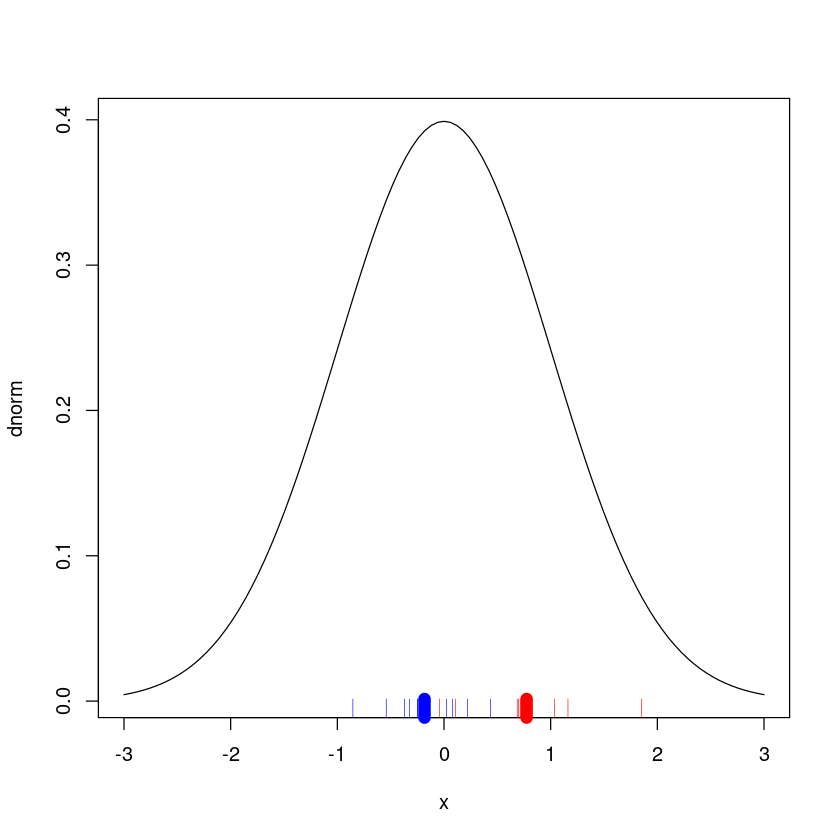

In [47]:
plot(dnorm,-3,3,type="l")
rug(X[min_p_value,],col="blue")
rug(Y[min_p_value,],col="red")
rug(mean(X[min_p_value,]),lwd=10,col="blue")
rug(mean(Y[min_p_value,]),lwd=10,col="red")